In [1]:
from sklearn.feature_selection import VarianceThreshold
data = ...
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)
# transformed data will have all columns with variance less
# than 0.1 removed

TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
# fetch a regression dataset
data = fetch_california_housing() 
X = data["data"]
col_names = data["feature_names"] 
y = data["target"]

In [6]:
df = pd.DataFrame(X, columns=col_names)
# introduce a highly correlated column
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)
# get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [7]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import mutual_info_regression 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [8]:
class UnivariateFeatureSelection:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper on different
        univariate feature selection models from scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scorint function, string
        """

        # for a given problem type, there are only 
        # a few valid scoring methods
        # you can extend this with your own custom
        # methods if you wish

        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }
        
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")

        # if n_features is int, we use selectkbest
        # if n_features is float, we use selectpercentile
        # please note that it is int in both cases in sklearn

        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")
            
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [9]:
ufs = UnivariateFeatureSelction(
        n_features=0.1, problem_type="regression", scoring="f_regression"
)
ufs.fit(X, y)
X_transformed = ufs.transform(X)

NameError: name 'UnivariateFeatureSelction' is not defined

In [12]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_california_housing
# fetch a regression dataset
data = fetch_california_housing() 
X = data["data"]
col_names = data["feature_names"] 
y = data["target"]

In [13]:
# initialize the model
model = LinearRegression()
# initialize RFE
rfe = RFE( estimator=model, n_features_to_select=3
)
# fit RFE
rfe.fit(X, y)
# get the transformed data with
# selected columns
X_transformed = rfe.transform(X)

In [15]:
X.shape

(20640, 8)

In [16]:
X_transformed.shape

(20640, 3)

In [17]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
# fetch a regression dataset
# in diabetes data we predict diabetes progression # after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

RandomForestRegressor()

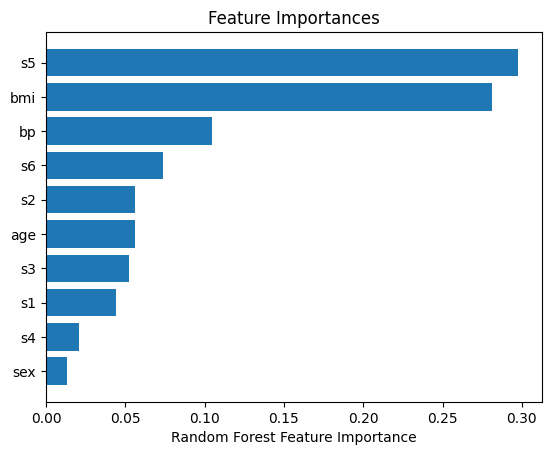

In [23]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center') 
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [24]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# fetch a regression dataset
# in diabetes data we predict diabetes progression # after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# select from the model
sfm = SelectFromModel(estimator=model) 
X_transformed = sfm.fit_transform(X, y)
# see which features were selected
support = sfm.get_support()
# get feature names
print([
x for x, y in zip(col_names, support) if y == True
])

['bmi', 's5']
